# Projeto de processamento de linguagem natural

Bem-vindo ao Projeto NLP para esta seção do curso. Neste projeto NLP, você estará tentando classificar Avaliações da Yelp em categorias de 1 estrela ou 5 estrelas com base no conteúdo do texto nas revisões. Este será um procedimento mais simples do que a palestra, pois utilizaremos os métodos do pipeline para tarefas mais complexas.

Usaremos o [Conjunto de dados de reviews da Yelp da Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Cada observação neste conjunto de dados é uma revisão de um determinado negócio por um determinado usuário.

A coluna "stars" é o número de estrelas (1 a 5) atribuídas pelo revisor ao negócio (mis estrelas é melhor.) 
A coluna "cool" é o número de votos "legais" que esta avaliação recebeu de outros usuários de usuários.

Todas as avaliações começam com 0 votos "legais", e não há limite para quantos votos "legais" podem receber uma avaliação. Em outras palavras, é uma classificação da revisão em si, não uma classificação do negócio.

As colunas "useful" e "funny" são semelhantes à coluna "cool".

Vamos começar! Basta seguir as instruções abaixo!

 ## Importações
  ** Importe as bibliotecas habituais. **

In [1]:
import pandas as pd
import numpy as np

## Os dados

** Leia o arquivo yelp.csv e configure-o como um dataframe chamado yelp. **

In [2]:
yelp = pd.read_csv('/media/felipe/SAMSUNG/LAPTOP RECENTE/felipe/Python3.7/udemyCOURSES/PythonParaDataScienceEMachineLearning/Python-Data-Science-and-Machine-Learning-Bootcamp/5. Machine Learning/Processamento de linguagem natural/yelp.csv')

** Verifique os métodos head(), info() e describe() em yelp. **

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
yelp['type'].describe()

count      10000
unique         1
top       review
freq       10000
Name: type, dtype: object

In [7]:
yelp['stars'].describe()

count    10000.000000
mean         3.777500
std          1.214636
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


** Crie uma nova coluna chamada "comprimento do texto", que é o número de palavras na coluna de texto. **

In [8]:
yelp['text length'] = yelp['text'].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# Análise exploratória de dados

Vamos explorar os dados

## Importações

** Importe as bibliotecas de visualização de dados se você ainda não o fez. **

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

** Use o FacetGrid da biblioteca seaborn para criar uma grid de 5 histogramas de comprimento de texto com base nas classificações das estrelas. Consulte a documentação Seaborn para obter dicas sobre como fazer isso, caso não lembre. **

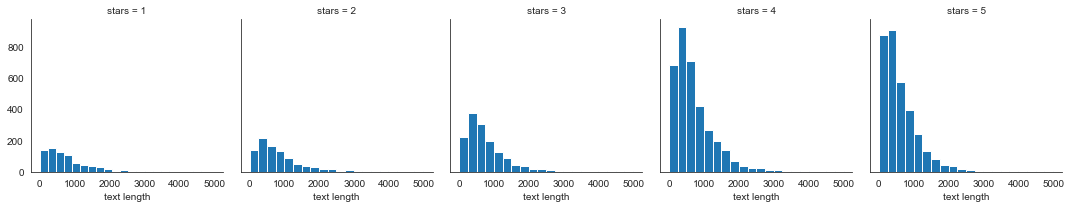

In [10]:
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text length', bins=20)    # Vamos MAPEAR os dados usando o plt.hist

#### Notemos que, apesar das distribuições de cada pontuação serem parecidas, as pontuações mais dadas foram as de 4 e 5 estrelas.

** Crie um boxplot do comprimento de texto para cada categoria de estrelas. **

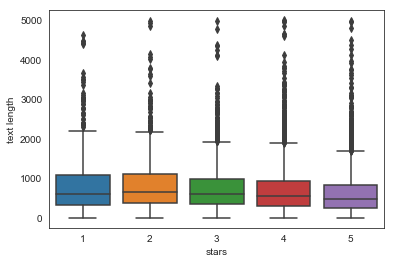

In [11]:
sns.boxplot(x='stars', y='text length', data=yelp)

#### Este plot não é bom para comparar as avaliações dos clientes.

** Crie um countplot do número de ocorrências para cada tipo de classificação de estrelas. **

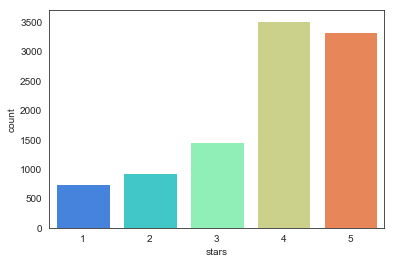

In [12]:
sns.countplot(x='stars', data=yelp, palette='rainbow')

** Use groupby para obter os valores médios das colunas numéricas. **

In [13]:
Stars = yelp.groupby('stars').mean()
Stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


** Use o método corr () nesse conjunto de dados groupby para produzir este dataframe: **

In [14]:
Stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


** Em seguida, use Seaborn para criar um heatmap com base em que .corr () dataframe: **

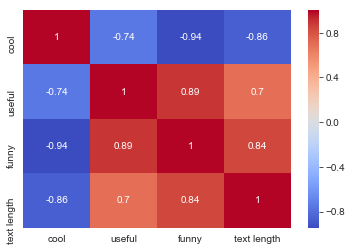

In [15]:
sns.heatmap(Stars.corr(), cmap='coolwarm', annot=True)

## Tarefa de classificação de NLP

Vamos passar para a tarefa atual. Para tornar as coisas um pouco mais fáceis, vá em frente e apenas pegue comentários que foram de 1 estrela ou 5 estrelas.

** Crie um banco de dados chamado yelp_class que contenha as colunas do banco de dados do yelp, mas apenas para as avaliações de 1 ou 5 estrelas. **

In [19]:
yelp_class = yelp[(yelp.stars == 1) | (yelp.stars == 5)]
yelp_class.head(8)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,186
10,AsSCv0q_BWqIe3mX2JqsOQ,2010-06-16,E11jzpKz9Kw5K7fuARWfRw,5,The oldish man who owns the store is as sweet ...,review,-OMlS6yWkYjVldNhC31wYg,1,3,1,298
11,e9nN4XxjdHj4qtKCOPq_vg,2011-10-21,3rPt0LxF7rgmEUrznoH22w,5,Wonderful Vietnamese sandwich shoppe. Their ba...,review,C1rHp3dmepNea7XiouwB6Q,1,1,0,321


In [20]:
yelp_class.stars.value_counts()

5    3337
1     749
Name: stars, dtype: int64

** Crie dois objetos x e y, onde x será a coluna "texto" de yelp_class e y será a coluna 'estrelas' do yelp_class.**

In [21]:
x = yelp_class['text']
y = yelp_class['stars']

** Import CountVectorizer e crie um objeto CountVectorizer. **

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
CV = CountVectorizer()

** Use o método fit_transform no objeto CountVectorizer e passe em X (a coluna 'texto'). Salve esse resultado substituindo X. **

In [24]:
x = CV.fit_transform(x)

## Divisão treino-teste

Vamos dividir nossos dados em dados de treinamento e teste.

** Use train_test_split para dividir os dados em X_train, X_test, y_train, y_test. Use test_size = 0.3 e random_state = 101 **

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## Treinando o modelo

Hora de treinar o modelo!

** Import MultinomialNB e crie uma instância do estimador e o chame de nb **

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
nb = MultinomialNB()

** Agora ajuste nb usando os dados de treinamento. **

In [29]:
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Previsões e avaliações

Tempo para ver como nosso modelo ficou!

** Use o método predict() do nb para prever X_test. **

In [30]:
Predictions = nb.predict(x_test)

** Crie uma matriz de confusão e um relatório de classificação usando essas previsões e y_test **

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(y_test, Predictions))
print('\n')
print(confusion_matrix(y_test, Predictions))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

   micro avg       0.93      0.93      0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



[[159  69]
 [ 22 976]]


#### Notemos que, apesar de termos considerado apenas as avaliações extremas de 1 estrela ou 5 estrelas, o resultado que obtivemos foi ótimo pois inclui operações de aprendizado de máquina lendo dados de textos para conseguir acertar qual foi a nota dada pelos clientes sem pré-tratamento de dados sem tirar as stopwords e sem termos ainda usado o TF-IDF.

**Ótimo! Vamos ver o que acontece se tentarmos incluir o TF-IDF nesse processo usando um pipeline. **

# Usando o processamento de texto

** Importe TfidfTransformer do sklearn. **

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer

** Importe pipeline da sklearn que basicamente define um fluxo de trabalho. **

In [34]:
from sklearn.pipeline import Pipeline

** Agora crie um pipeline com as seguintes etapas: CountVectorizer (), TfidfTransformer (), MultinomialNB () **

In [35]:
pipeline = Pipeline([
    ('Bow', CountVectorizer()),     # neste caso não definimos função de pré-operação para o analyzer   
    ('tfidf', TfidfTransformer()),  # Faz a transformação em TF-IDF
    ('Classifier', MultinomialNB()),  # Define a classe que realizará nossa classificação.
])

## Using the Pipeline

** Hora de usar o pipeline! Lembre-se de que este pipeline já possui todas as suas etapas de pré-processo, o que significa que precisaremos re-dividir os dados originais (Lembre-se de que sobrecarregamos o X como a versão CountVectorized. O que precisamos é apenas o texto **

### Divisão treino-teste

** Refaça a divisão treino-teste no objeto yelp_class. **

#### Devemos redefinir nossos dados x e y porque o x anterior já passou por transformação e fit (CV.fit_transform(x)) e, por isso, já possui passou por um CountVectorizer. Não faria sentido redar um CountVectorizer 2 vezes.

In [36]:
X = yelp_class['text']
Y = yelp_class['stars']

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

** Agora ajuste o pipeline aos dados de treinamento. Lembre-se de que você não pode usar os mesmos dados de treinamento da última vez porque esses dados já foram vetados. Precisamos passar apenas no texto e nos rótulos **

In [38]:
pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('Bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('Classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Previsões e Avaliação

** Agora use o pipeline para prever a partir do X_test e crie um relatório de classificação e uma matriz de confusão. Você deve notar resultados estranhos. **

In [39]:
predictions = pipeline.predict(X_test)

In [40]:
print(classification_report(Y_test, predictions))
print('\n')
print(confusion_matrix(Y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

   micro avg       0.81      0.81      0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



[[  0 228]
 [  0 998]]


/home/felipe/Python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/felipe/Python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/felipe/Python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Parece que o Tf-Idf realmente piorou as coisas!

É isto para este projeto. 
** Algumas outras coisas para tentar .... **
Tente voltar e brincar com as etapas do pipeline e ver se criar um analisador personalizado como fizemos na aula... Ou recrie o pipeline com apenas o CountVectorizer() e NaiveBayes. A mudança do modelo ML no final para outro classificador ajudou?

### Vamos testar um modelo usando outro método de classificador: o RandomForestClassifier.

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
pipeline_RFC = Pipeline([
    ('Bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('Classifier', RandomForestClassifier()),  
])

In [44]:
pipeline_RFC.fit(X_train, Y_train)

/home/felipe/Python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('Bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [45]:
Predictions_RFC = pipeline.predict(X_test)

In [46]:
print(classification_report(Y_test, Predictions_RFC))
print('\n')
print(confusion_matrix(Y_test, Predictions_RFC))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

   micro avg       0.81      0.81      0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



[[  0 228]
 [  0 998]]


/home/felipe/Python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/felipe/Python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/felipe/Python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Infelizmente deu no mesmo resultado.